# [Tutorial](https://github.com/AI4Finance-Foundation/FinRL-Tutorials/blob/master/1-Introduction/Stock_NeurIPS2018/Stock_NeurIPS2018_3_Backtest.ipynb)

In [1]:
#!pip uninstall scipy

In [2]:
#From NVIDIA

# 1.Importando as bibliotecas

In [3]:
##
## install required packages
#!pip install swig
#!pip install wrds
#!pip install pyportfolioopt
#!pip install git+https://github.com/AI4Finance-Foundation/FinRL.git

In [4]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.agents.stablebaselines3.models import DRLAgent
from stable_baselines3 import A2C, DDPG, PPO, SAC, TD3

%matplotlib inline
from finrl.config import INDICATORS

**Para mais informações sobre [quantstats](https://pypi.org/project/QuantStats/)**

In [5]:
#import quantstats as qs

# 2.Importando os dados

In [6]:
train = pd.read_csv('train_data_ibovespa.csv')
trade = pd.read_csv('trade_data_ibovespa.csv')

# If you are not using the data generated from part 1 of this tutorial, make sure 
# it has the columns and index in the form that could be make into the environment. 
# Then you can comment and skip the following lines.
train = train.set_index(train.columns[0])
train.index.names = ['']
trade = trade.set_index(trade.columns[0])
trade.index.names = ['']

In [7]:
train.head()

,date,tic,open,high,low,close,volume,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
,,,,,,,,,,,,,,,,,,
0,2009-01-02,ABEV3.SA,3.333858,3.556008,3.333858,2.150698,590662.0,4.0,0.0,2.216974,2.011928,0.0,66.666667,100.0,2.150698,2.150698,39.189999,0.0
0,2009-01-02,BBAS3.SA,14.680000,15.250000,14.600000,5.934311,2801600.0,4.0,0.0,2.216974,2.011928,0.0,66.666667,100.0,5.934311,5.934311,39.189999,0.0
0,2009-01-02,BBDC3.SA,5.856117,6.178203,5.738994,3.445034,616107.0,4.0,0.0,2.216974,2.011928,0.0,66.666667,100.0,3.445034,3.445034,39.189999,0.0
0,2009-01-02,BBDC4.SA,14.166245,14.166245,14.166245,7.943635,0.0,4.0,0.0,2.216974,2.011928,0.0,66.666667,100.0,7.943635,7.943635,39.189999,0.0
0,2009-01-02,BEEF3.SA,1.858427,2.015754,1.819095,1.486063,230958.0,4.0,0.0,2.216974,2.011928,0.0,66.666667,100.0,1.486063,1.486063,39.189999,0.0


In [8]:
trade.head()

,date,tic,open,high,low,close,volume,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
,,,,,,,,,,,,,,,,,,
0,2019-06-19,ABEV3.SA,18.049999,18.360001,17.980000,15.721224,23446200.0,2.0,0.152904,15.663305,14.661381,57.200970,167.722872,23.650660,14.982096,15.036227,14.33,24.913164
0,2019-06-19,BBAS3.SA,51.500000,52.500000,51.110001,39.596638,7964300.0,2.0,0.529207,40.401258,37.154286,56.015006,66.083933,2.784967,37.781369,37.048178,14.33,24.913164
0,2019-06-19,BBDC3.SA,24.350113,24.748308,23.944403,19.880020,3485755.0,2.0,0.282393,20.480991,18.284890,56.957863,67.945098,12.518559,18.834974,18.733100,14.33,24.913164
0,2019-06-19,BBDC4.SA,27.227648,27.723516,26.867018,22.328823,20888447.0,2.0,0.209542,23.129236,20.960027,54.459579,52.308731,9.690325,21.571333,21.516488,14.33,24.913164
0,2019-06-19,BEEF3.SA,7.866358,7.954854,7.797527,6.243949,6414658.0,2.0,0.037579,6.432561,6.092708,53.460961,-20.314667,15.627085,6.255368,6.108482,14.33,24.913164


# 3.Importando os agentes

In [9]:
if_using_a2c = True
if_using_ddpg = True
if_using_ppo = True
if_using_td3 = True
if_using_sac = True

In [10]:
trained_a2c = A2C.load("trained_models/agent_a2c") if if_using_a2c else None
trained_ddpg = DDPG.load("trained_models/agent_ddpg") if if_using_ddpg else None
trained_ppo = PPO.load("trained_models/agent_ppo") if if_using_ppo else None
trained_td3 = TD3.load("trained_models/agent_td3") if if_using_td3 else None
trained_sac = SAC.load("trained_models/agent_sac") if if_using_sac else None

C:\Users\jefer\anaconda3\envs\teste_finrl\lib\site-packages\stable_baselines3\common\buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 3.80GB > 2.65GB
  warnings.warn(
C:\Users\jefer\anaconda3\envs\teste_finrl\lib\site-packages\stable_baselines3\common\buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 3.80GB > 2.64GB
  warnings.warn(


# 4.Desempenho dos modelos nos dados de teste

In [11]:
#funcao para tratar os dados para passar para funcao quantstats
def tratando_retornos(data,coluna):
    net_worth = pd.Series(data[coluna].values, index=pd.to_datetime(data['date']))
    returns = net_worth.pct_change().iloc[1:]
    return returns

In [12]:
def tratando_retornos_mean(data,coluna):
    net_worth = pd.Series(data[coluna].values, index=pd.to_datetime(data.index))
    returns = net_worth.pct_change().iloc[1:]
    return returns

In [13]:
stock_dimension = len(trade.tic.unique())
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 45, State Space: 451


In [14]:
valor_inicial_carteira = 1000
custo_trade = [0.01]
taxa_aprendizagem = 0.01
iteracao = 1000000

In [15]:
buy_cost_list = sell_cost_list = custo_trade * stock_dimension
num_stock_shares = [0] * stock_dimension

env_kwargs = {
    "hmax": 100,
    "initial_amount": valor_inicial_carteira,
    "num_stock_shares": num_stock_shares,
    "buy_cost_pct": buy_cost_list,
    "sell_cost_pct": sell_cost_list,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4
}

In [16]:
e_trade_gym = StockTradingEnv(df = trade, turbulence_threshold = 70,risk_indicator_col='vix', **env_kwargs,make_plots=True)
# env_trade, obs_trade = e_trade_gym.get_sb_env()

In [17]:
trade

,date,tic,open,high,low,close,volume,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,vix,turbulence
,,,,,,,,,,,,,,,,,,
0,2019-06-19,ABEV3.SA,18.049999,18.360001,17.980000,15.721224,23446200.0,2.0,0.152904,15.663305,14.661381,57.200970,167.722872,23.650660,14.982096,15.036227,14.330000,24.913164
0,2019-06-19,BBAS3.SA,51.500000,52.500000,51.110001,39.596638,7964300.0,2.0,0.529207,40.401258,37.154286,56.015006,66.083933,2.784967,37.781369,37.048178,14.330000,24.913164
0,2019-06-19,BBDC3.SA,24.350113,24.748308,23.944403,19.880020,3485755.0,2.0,0.282393,20.480991,18.284890,56.957863,67.945098,12.518559,18.834974,18.733100,14.330000,24.913164
0,2019-06-19,BBDC4.SA,27.227648,27.723516,26.867018,22.328823,20888447.0,2.0,0.209542,23.129236,20.960027,54.459579,52.308731,9.690325,21.571333,21.516488,14.330000,24.913164
0,2019-06-19,BEEF3.SA,7.866358,7.954854,7.797527,6.243949,6414658.0,2.0,0.037579,6.432561,6.092708,53.460961,-20.314667,15.627085,6.255368,6.108482,14.330000,24.913164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,2022-01-26,UGPA3.SA,14.130000,14.830000,14.020000,13.419630,12434400.0,2.0,-0.083954,13.696630,11.627995,51.625196,45.199194,18.080459,13.047697,13.012193,31.959999,38.328956
631,2022-01-26,USIM5.SA,16.330000,16.709999,15.770000,14.787024,35743200.0,2.0,0.403402,15.820255,12.604494,55.738793,75.502264,10.741102,14.029746,13.035091,31.959999,38.328956
631,2022-01-26,VALE3.SA,85.900002,86.559998,83.820000,72.341820,25806800.0,2.0,1.819475,77.060980,65.054238,56.169662,73.014175,17.610762,69.928430,64.896969,31.959999,38.328956


## Avaliando A2C

In [18]:
df_account_value_a2c, df_actions_a2c = DRLAgent.DRL_prediction(
    model=trained_a2c, 
    environment = e_trade_gym) if if_using_a2c else (None, None)

hit end!


## Avaliando ddpg

In [19]:
df_account_value_ddpg, df_actions_ddpg = DRLAgent.DRL_prediction(
    model=trained_ddpg, 
    environment = e_trade_gym) if if_using_ddpg else (None, None)

hit end!


## Avaliando PPO

In [20]:
df_account_value_ppo, df_actions_ppo = DRLAgent.DRL_prediction(
    model=trained_ppo, 
    environment = e_trade_gym) if if_using_ppo else (None, None)

hit end!


## Avaliando TD3

In [21]:
df_account_value_td3, df_actions_td3 = DRLAgent.DRL_prediction(
    model=trained_td3, 
    environment = e_trade_gym) if if_using_td3 else (None, None)

hit end!


## Avaliando SAC

In [22]:
df_account_value_sac, df_actions_sac = DRLAgent.DRL_prediction(
    model=trained_sac, 
    environment = e_trade_gym) if if_using_sac else (None, None)

hit end!


# 5.Carteira de otimização de variançia média 

In [23]:
def process_df_for_mvo(df):
  df = df.sort_values(['date','tic'],ignore_index=True)[['date','tic','close']]
  fst = df
  fst = fst.iloc[0:stock_dimension, :]
  tic = fst['tic'].tolist()

  mvo = pd.DataFrame()

  for k in range(len(tic)):
    mvo[tic[k]] = 0

  for i in range(df.shape[0]//stock_dimension):
    n = df
    n = n.iloc[i * stock_dimension:(i+1) * stock_dimension, :]
    date = n['date'][i*stock_dimension]
    mvo.loc[date] = n['close'].tolist()
  
  return mvo

In [24]:
# Codes in this section partially refer to Dr G A Vijayalakshmi Pai

# https://www.kaggle.com/code/vijipai/lesson-5-mean-variance-optimization-of-portfolios/notebook

def StockReturnsComputing(StockPrice, Rows, Columns): 
  import numpy as np 
  StockReturn = np.zeros([Rows-1, Columns]) 
  for j in range(Columns):        # j: Assets 
    for i in range(Rows-1):     # i: Daily Prices 
      StockReturn[i,j]=((StockPrice[i+1, j]-StockPrice[i,j])/StockPrice[i,j])* 100 
      
  return StockReturn

In [25]:
StockData = process_df_for_mvo(train)
TradeData = process_df_for_mvo(trade)

TradeData.to_numpy()

array([[15.72122383, 39.59663773, 19.88002014, ..., 35.67543411,
         9.96969032, 27.63564301],
       [15.9371748 , 39.90586853, 20.33869743, ..., 35.77092743,
        10.09213352, 28.27018356],
       [15.80760193, 40.00391388, 20.42922974, ..., 35.74364853,
        10.16277409, 28.08076477],
       ...,
       [13.96422768, 27.19640923, 14.63719559, ..., 71.9728241 ,
        28.96385193, 19.21440506],
       [14.31570816, 27.89909172, 15.14364338, ..., 72.13587189,
        29.25446129, 20.37118912],
       [14.24921227, 27.63016129, 15.15194798, ..., 72.34181976,
        29.77755547, 20.39079475]])

In [26]:
#compute asset returns
arStockPrices = np.asarray(StockData)
[Rows, Cols]=arStockPrices.shape
arReturns = StockReturnsComputing(arStockPrices, Rows, Cols)

#compute mean returns and variance covariance matrix of returns
meanReturns = np.mean(arReturns, axis = 0)
covReturns = np.cov(arReturns, rowvar=False)
 
#set precision for printing results
np.set_printoptions(precision=3, suppress = True)

#display mean returns and variance-covariance matrix of returns
print('Mean returns of assets in k-portfolio 1\n', meanReturns)
print('Variance-Covariance matrix of returns\n', covReturns)

Mean returns of assets in k-portfolio 1
 [0.089 0.106 0.088 0.066 0.087 0.069 0.048 0.122 0.073 0.073 0.058 0.097
 0.081 0.068 0.076 0.084 0.083 0.054 0.115 0.15  0.038 0.006 0.124 0.086
 0.081 0.076 0.108 0.144 0.04  0.124 0.098 0.102 0.045 0.052 0.15  0.152
 0.102 0.101 0.084 0.098 0.067 0.045 0.071 0.092 0.126]
Variance-Covariance matrix of returns
 [[2.268 1.229 1.221 ... 1.048 0.71  0.725]
 [1.229 6.509 3.473 ... 2.403 1.22  2.151]
 [1.221 3.473 3.956 ... 1.943 1.233 1.677]
 ...
 [1.048 2.403 1.943 ... 7.074 1.028 1.385]
 [0.71  1.22  1.233 ... 1.028 3.232 0.873]
 [0.725 2.151 1.677 ... 1.385 0.873 7.33 ]]


In [27]:
from pypfopt.efficient_frontier import EfficientFrontier

ef_mean = EfficientFrontier(meanReturns, covReturns, weight_bounds=(0, 0.5))
raw_weights_mean = ef_mean.max_sharpe()
cleaned_weights_mean = ef_mean.clean_weights()
mvo_weights = np.array([valor_inicial_carteira * cleaned_weights_mean[i] for i in range(stock_dimension)])

In [28]:
LastPrice = np.array([1/p for p in StockData.tail(1).to_numpy()[0]])
Initial_Portfolio = np.multiply(mvo_weights, LastPrice)

In [29]:
Portfolio_Assets = TradeData @ Initial_Portfolio
MVO_result = pd.DataFrame(Portfolio_Assets, columns=["Mean Var"])
# MVO_result

In [30]:
pesos_acoes_mean_var = pd.DataFrame(cleaned_weights_mean.values(),trade.tic.unique(),columns = ['Pesos']).sort_values(by='Pesos',ascending=False)
pesos_acoes_mean_var.head(15)

,Pesos
RADL3.SA,0.18830
TAEE11.SA,0.17550
EQTL3.SA,0.15008
EZTC3.SA,0.08564
ABEV3.SA,0.08165
RENT3.SA,0.07551
BRKM5.SA,0.05447
PCAR3.SA,0.04779
TOTS3.SA,0.04110
LREN3.SA,0.03017


# 6.Bentmarch

## Ibovespa

In [31]:
#Pegando as datas para importar o indice ibovespa
TRAIN_START_DATE = train.date.min()
TRAIN_END_DATE = train.date.max()
TRADE_START_DATE = trade.date.min()
TRADE_END_DATE = trade.date.max()

In [32]:
print('Treino inicio',TRAIN_START_DATE, 'e treino final',TRAIN_END_DATE)
print('Teste inicio',TRADE_START_DATE, 'e teste final',TRADE_END_DATE)

Treino inicio 2009-01-02 e treino final 2019-06-17
Teste inicio 2019-06-19 e teste final 2022-01-26


In [33]:
df_ibovespa = YahooDownloader(start_date = TRADE_START_DATE,
                     end_date = TRADE_END_DATE,
                     ticker_list = ['^BVSP']).fetch_data()

[*********************100%%**********************]  1 of 1 completed
Shape of DataFrame:  (645, 8)


In [34]:
df_ibovespa.head()

,date,open,high,low,close,volume,tic,day
0,2019-06-19,99403.0,100327.0,98978.0,100303.0,4411300,^BVSP,2
1,2019-06-21,100305.0,102100.0,100305.0,102013.0,5490800,^BVSP,4
2,2019-06-24,102018.0,102617.0,101589.0,102062.0,3559800,^BVSP,0
3,2019-06-25,102061.0,102061.0,99890.0,100093.0,4469200,^BVSP,1
4,2019-06-26,100095.0,101126.0,100095.0,100689.0,5013800,^BVSP,2


In [35]:
df_ibovespa = df_ibovespa[['date','close']]
fst_day = df_ibovespa['close'][0]
ibovespa = pd.merge(df_ibovespa['date'], df_ibovespa['close'].div(fst_day).mul(valor_inicial_carteira), 
               how='outer', left_index=True, right_index=True).set_index('date')

In [36]:
df_ibovespa.head()

,date,close
0,2019-06-19,100303.0
1,2019-06-21,102013.0
2,2019-06-24,102062.0
3,2019-06-25,100093.0
4,2019-06-26,100689.0


## CDI

[IPEADATA](https://analisemacro.com.br/economia/indicadores/coletando-dados-do-ipeadata-com-python/)


In [37]:
!pip install ipeadatapy
import ipeadatapy as ip

In [38]:
ipea_data = ip.list_series()

In [39]:
ipea_data[ipea_data.CODE.str.contains('CDI')]

,CODE,NAME
8244,BM12_TJCDI12,Taxa de juros - CDI / Over - acumulada no mês
8282,SGS366_CDI366,Taxa de juros - CDI
9254,PNADCA_PCTEMDCDISTUF,"Porcentagem de estudantes de especialização, m..."
9256,PNADCA_PCTSPGCDISTUF,Porcentagem de estudantes do ensino superior e...


In [40]:
ipea_data[ipea_data.NAME.str.contains('CDI')]

,CODE,NAME
8244,BM12_TJCDI12,Taxa de juros - CDI / Over - acumulada no mês
8282,SGS366_CDI366,Taxa de juros - CDI


In [41]:
ip.describe('SGS366_CDI366')

,Taxa de juros - CDI
Name,Taxa de juros - CDI
Code,SGS366_CDI366
Big Theme,Macroeconômico
Theme code,39
Source,"Banco Central do Brasil, Sistema Gerenciador d..."
Source acronym,Bacen Outras/SGS
Comment,Receber uma quantia hoje ou no futuro não são ...
Last update,2023-12-08T13:07:59.873-03:00
Frequency,Diária
Measure,(%)


In [42]:
selic_diaria = ip.timeseries('SGS366_CDI366')

In [43]:
selic_diaria.head()

,CODE,RAW DATE,DAY,MONTH,YEAR,VALUE ((%))
DATE,,,,,,
1986-03-06,SGS366_CDI366,1986-03-06T00:00:00-03:00,6,3,1986,0.068111
1986-03-10,SGS366_CDI366,1986-03-10T00:00:00-03:00,10,3,1986,0.069028
1986-03-12,SGS366_CDI366,1986-03-12T00:00:00-03:00,12,3,1986,0.067417
1986-03-14,SGS366_CDI366,1986-03-14T00:00:00-03:00,14,3,1986,0.064584
1986-03-17,SGS366_CDI366,1986-03-17T00:00:00-03:00,17,3,1986,0.068222


In [44]:
selic_diaria = (selic_diaria['VALUE ((%))']/100).to_frame()

In [45]:
min_date = trade['date'].min()
max_date = trade['date'].max()

selic_diaria = selic_diaria[(selic_diaria.index >= min_date) & (selic_diaria.index <= max_date)]
selic_diaria

,VALUE ((%))
DATE,
2019-06-19,0.000246
2019-06-21,0.000246
2019-06-24,0.000246
2019-06-25,0.000246
2019-06-26,0.000246
...,...
2022-01-20,0.000348
2022-01-21,0.000348
2022-01-24,0.000348


In [46]:
selic_return = (selic_diaria['VALUE ((%))']+1).cumprod().mul(valor_inicial_carteira).to_frame()

In [47]:
selic_return

,VALUE ((%))
DATE,
2019-06-19,1000.246200
2019-06-21,1000.492461
2019-06-24,1000.738782
2019-06-25,1000.985164
2019-06-26,1001.231606
...,...
2022-01-20,1110.368377
2022-01-21,1110.754230
2022-01-24,1111.140217


# 7. Backtesting dos resultados

In [48]:
df_result_a2c = df_account_value_a2c.set_index(df_account_value_a2c.columns[0]) if if_using_a2c else None
if if_using_a2c:
    df_result_a2c.columns = ['a2c']
df_result_ddpg = df_account_value_ddpg.set_index(df_account_value_ddpg.columns[0]) if if_using_ddpg else None
if if_using_ddpg:
    df_result_ddpg.columns = ['ddpg']
df_result_ppo = df_account_value_ppo.set_index(df_account_value_ppo.columns[0]) if if_using_ppo else None
if if_using_ppo:
    df_result_ppo.columns = ['ppo']
df_result_td3 = df_account_value_td3.set_index(df_account_value_td3.columns[0]) if if_using_td3 else None
if if_using_td3:
    df_result_td3.columns = ['td3']
df_result_sac = df_account_value_sac.set_index(df_account_value_sac.columns[0]) if if_using_sac else None
if if_using_sac:
    df_result_sac.columns = ['sac']

result = pd.DataFrame()
if if_using_a2c: result = pd.merge(result, df_result_a2c, how='outer', left_index=True, right_index=True)

if if_using_ddpg: result = pd.merge(result, df_result_ddpg, how='outer', left_index=True, right_index=True)
if if_using_ppo: result = pd.merge(result, df_result_ppo, how='outer', left_index=True, right_index=True)
if if_using_td3: result = pd.merge(result, df_result_td3, how='outer', left_index=True, right_index=True)
if if_using_sac: result = pd.merge(result, df_result_sac, how='outer', left_index=True, right_index=True)
result = pd.merge(result, MVO_result, how='outer', left_index=True, right_index=True)
result = pd.merge(result, ibovespa, how='outer', left_index=True, right_index=True).fillna(method='bfill')
result = result.rename(columns={result.columns[-1]: 'Ibovespa'})
result.index = pd.to_datetime(result.index, format='%Y-%m-%d')
result = pd.merge(result, selic_return[selic_return.index.isin(result.index)], how='outer', left_index=True, right_index=True)
result = result.rename(columns={result.columns[-1]: 'CDI'})

C:\Users\jefer\AppData\Local\Temp\ipykernel_14904\385085763.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  result = pd.merge(result, ibovespa, how='outer', left_index=True, right_index=True).fillna(method='bfill')


In [49]:
result.head()

,a2c,ddpg,ppo,td3,sac,Mean Var,Ibovespa,CDI
date,,,,,,,,
2019-06-19,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1017.275414,1000.000000,1000.246200
2019-06-21,973.283038,1012.435325,971.528752,1012.843284,984.145451,1015.227161,1017.048344,1000.492461
2019-06-24,981.774488,1006.006759,963.479012,1005.988085,980.595614,1021.113520,1017.536863,1000.738782
2019-06-25,957.418000,967.297064,947.514354,967.101104,959.288806,1000.980811,997.906344,1000.985164
2019-06-26,967.627041,959.860937,948.978479,959.728616,964.045124,1004.058625,1003.848340,1001.231606


<Axes: xlabel='date'>

<Figure size 1500x500 with 0 Axes>

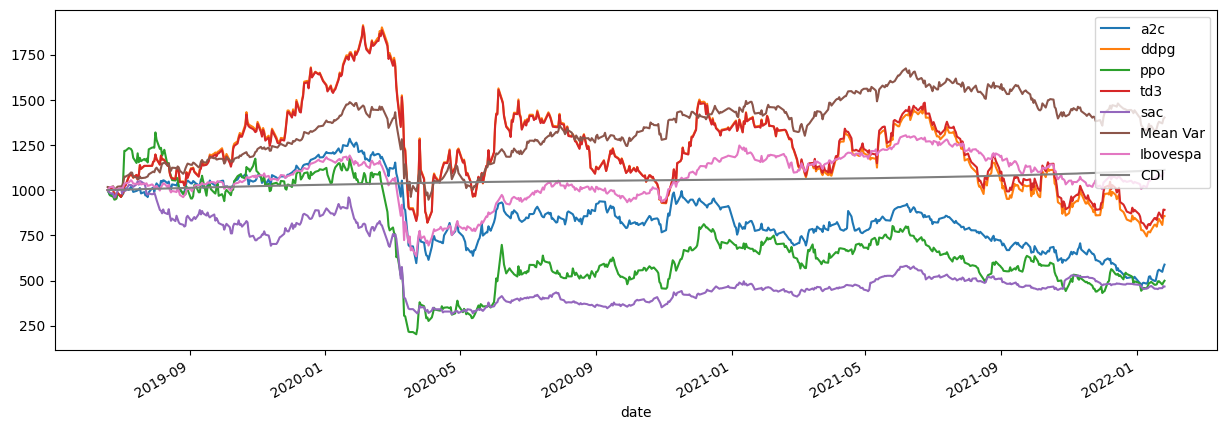

In [50]:
plt.rcParams["figure.figsize"] = (15,5)
plt.figure()
result.plot()

In [51]:
import plotly.graph_objs as go
import plotly.offline as pyo
# Criar traces para cada linha
trace_a2c = go.Scatter(x=result.index, y=result.a2c,  mode='lines', name='A2C')
trace_ddpg = go.Scatter(x=result.index, y=result.ddpg, mode='lines', name='DDPG')
trace_ppo = go.Scatter(x=result.index, y=result.ppo, mode='lines', name='PPO')
trace_td3 = go.Scatter(x=result.index, y=result.td3, mode='lines', name='TD3')
trace_sac = go.Scatter(x=result.index, y=result.sac, mode='lines', name='SAC')
trace_Mean_Var = go.Scatter(x=result.index, y=result['Mean Var'], mode='lines', name='Mean Var')
trace_Ibovespa = go.Scatter(x=result.index, y=result.Ibovespa, mode='lines', name='Ibovespa')
trace_CDI = go.Scatter(x=result.index, y=result.CDI, mode='lines', name='CDI')

# Colocar as traces em uma lista
data = [trace_a2c, trace_ddpg, trace_ppo, trace_td3, trace_sac, trace_Mean_Var, trace_Ibovespa, trace_CDI]

# Layout do gráfico
layout = go.Layout(title='Comparação de Dados',
                   xaxis=dict(title='Data'),
                   yaxis=dict(title='Valores'))
# Criar a figura e plotar
fig = go.Figure(data=data, layout=layout)
pyo.plot(fig, filename='dados.html')


'dados.html'

# 8.Quantstats: 
Se rodar essa biblioteca antes da um erro, tente instalar so depois

**Para mais informações sobre [quantstats](https://pypi.org/project/QuantStats/)**

In [52]:
import quantstats as qs

## A2C

In [53]:
try:
    if if_using_a2c:
        returns_a2c = tratando_retornos(df_account_value_a2c,'account_value')
        qs.extend_pandas()
        qs.reports.full(returns_a2c,ba)
        qs.reports.html(returns_a2c, output='a2c_quantstats.html')  
except:
    pass

## DDPG

C:\Users\jefer\anaconda3\envs\teste_finrl\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)

C:\Users\jefer\anaconda3\envs\teste_finrl\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)

C:\Users\jefer\anaconda3\envs\teste_finrl\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)



                           Strategy
-------------------------  ----------
Start Period               2019-06-21
End Period                 2022-01-26
Risk-Free Rate             0.0%
Time in Market             99.0%

Cumulative Return          -14.32%
CAGR﹪                     -4.02%

Sharpe                     0.19
Prob. Sharpe Ratio         61.71%
Smart Sharpe               0.18
Sortino                    0.28
Smart Sortino              0.27
Sortino/√2                 0.2
Smart Sortino/√2           0.19
Omega                      1.04

Max Drawdown               -61.11%
Longest DD Days            722
Volatility (ann.)          58.72%
Calmar                     -0.07
Skew                       0.31
Kurtosis                   9.34

Expected Daily %           -0.02%
Expected Monthly %         -0.48%
Expected Yearly %          -3.79%
Kelly Criterion            1.63%
Risk of Ruin               0.0%
Daily Value-at-Risk        -6.04%
Expected Shortfall (cVaR)  -6.04%

Max Consecutive Wins   

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2020-02-05,2022-01-10,2022-01-26,722,-61.105033,-59.318409
2,2019-08-02,2019-08-27,2019-09-18,48,-14.162265,-13.225375
3,2019-10-23,2019-11-12,2019-11-27,36,-12.392469,-11.523817
4,2019-12-20,2020-01-08,2020-01-16,28,-8.108743,-7.660589
5,2019-10-01,2019-10-08,2019-10-09,9,-7.241532,-5.582614


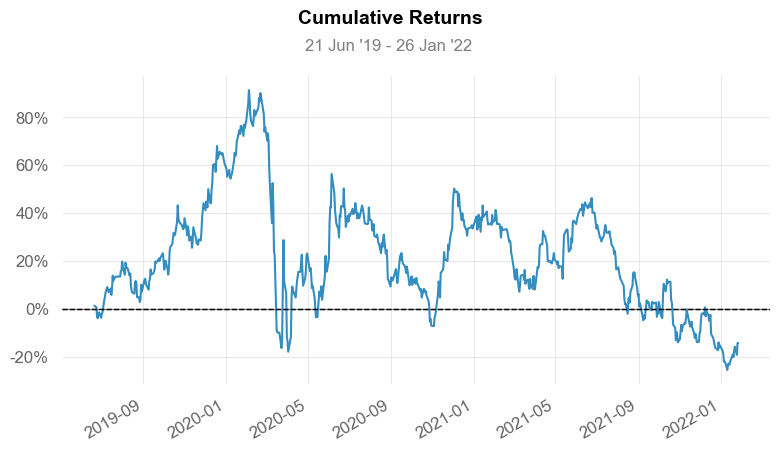

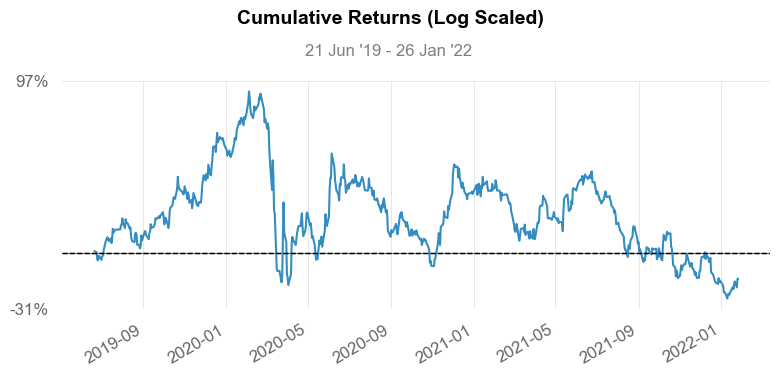

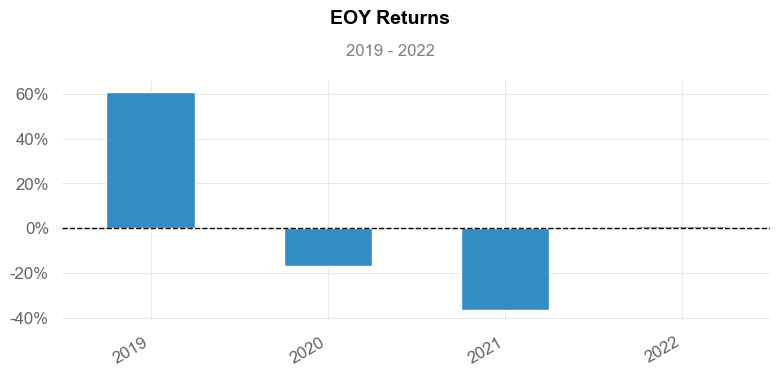

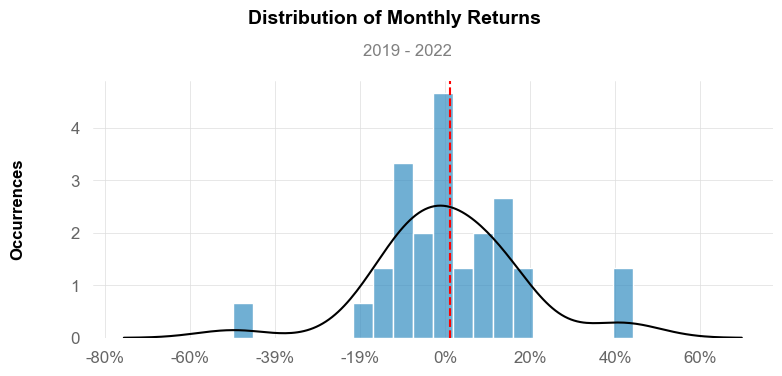

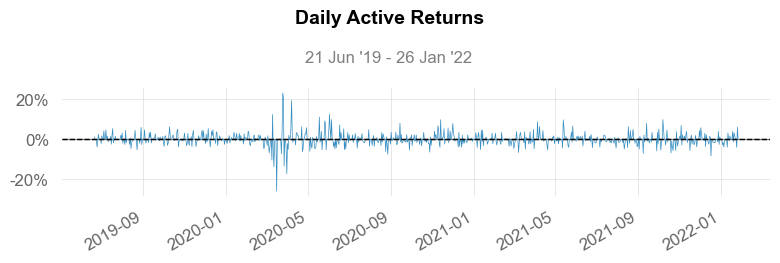

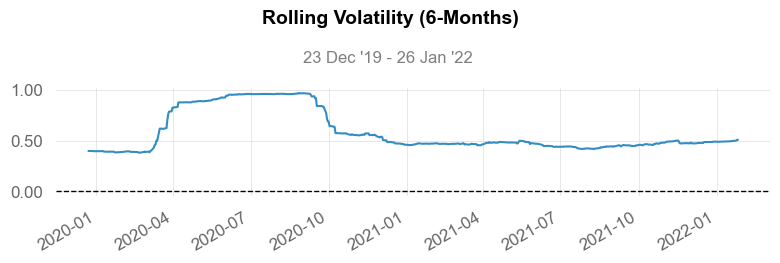

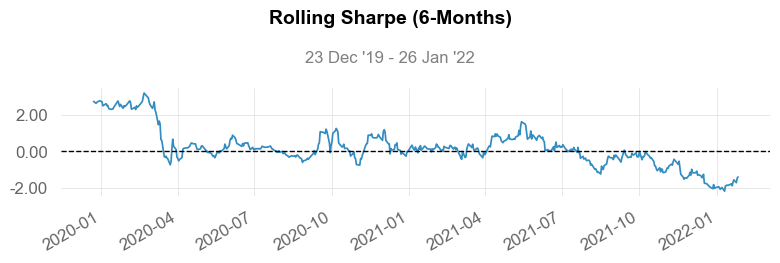

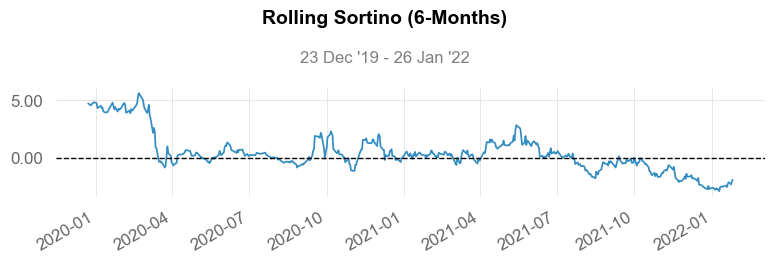

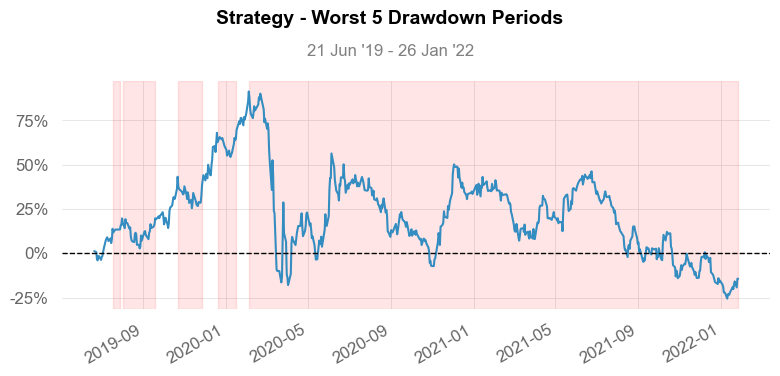

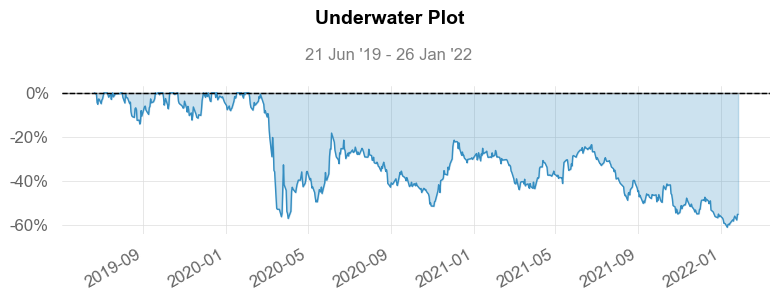

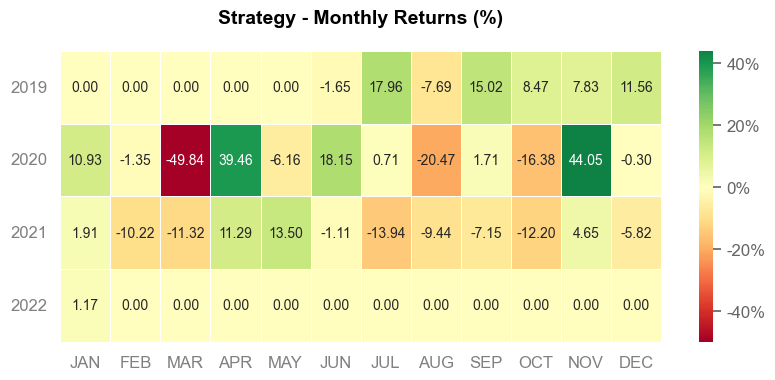

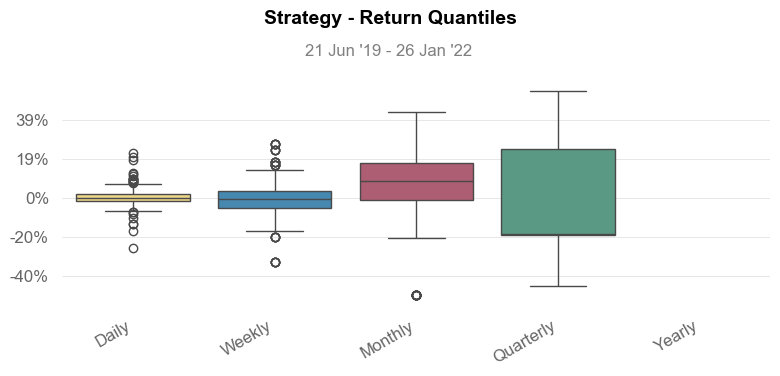

C:\Users\jefer\anaconda3\envs\teste_finrl\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)

C:\Users\jefer\anaconda3\envs\teste_finrl\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)

C:\Users\jefer\anaconda3\envs\teste_finrl\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)



In [54]:
try:
    if if_using_ddpg:
        returns_ddpg = tratando_retornos(df_account_value_ddpg,'account_value')
        qs.extend_pandas()
        qs.reports.full(returns_ddpg)
        qs.reports.html(returns_ddpg, output='ddpg_quantstats.html')
    else:
        None
except:
    pass

## PPO

C:\Users\jefer\anaconda3\envs\teste_finrl\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)

C:\Users\jefer\anaconda3\envs\teste_finrl\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)

C:\Users\jefer\anaconda3\envs\teste_finrl\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)



                           Strategy
-------------------------  ----------
Start Period               2019-06-21
End Period                 2022-01-26
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -50.13%
CAGR﹪                     -16.85%

Sharpe                     0.03
Prob. Sharpe Ratio         51.92%
Smart Sharpe               0.03
Sortino                    0.05
Smart Sortino              0.04
Sortino/√2                 0.03
Smart Sortino/√2           0.03
Omega                      1.01

Max Drawdown               -84.65%
Longest DD Days            909
Volatility (ann.)          77.27%
Calmar                     -0.2
Skew                       0.27
Kurtosis                   13.08

Expected Daily %           -0.11%
Expected Monthly %         -2.15%
Expected Yearly %          -15.97%
Kelly Criterion            0.27%
Risk of Ruin               0.0%
Daily Value-at-Risk        -8.0%
Expected Shortfall (cVaR)  -8.0%

Max Consecutive Wins 

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2019-08-02,2020-03-23,2022-01-26,909,-84.646626,-79.063486
2,2019-07-10,2019-07-15,2019-07-26,17,-6.693168,-6.480001
3,2019-06-24,2019-06-25,2019-06-27,4,-2.471816,-2.321112
4,2019-07-01,2019-07-01,2019-07-02,2,-2.091185,-0.781523
5,2019-07-31,2019-07-31,2019-07-31,1,-0.124821,NaN


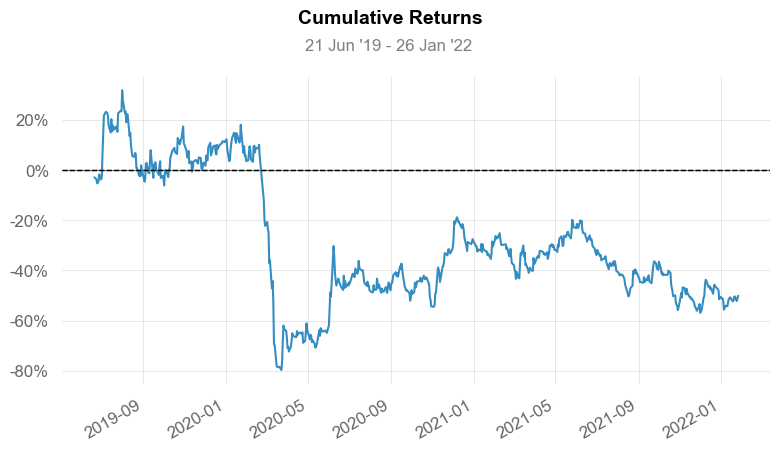

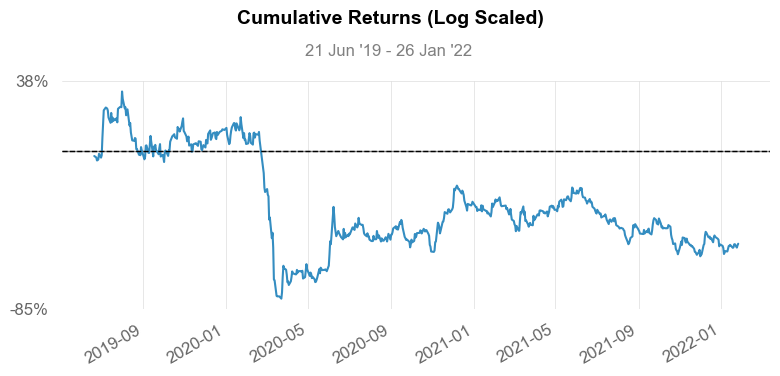

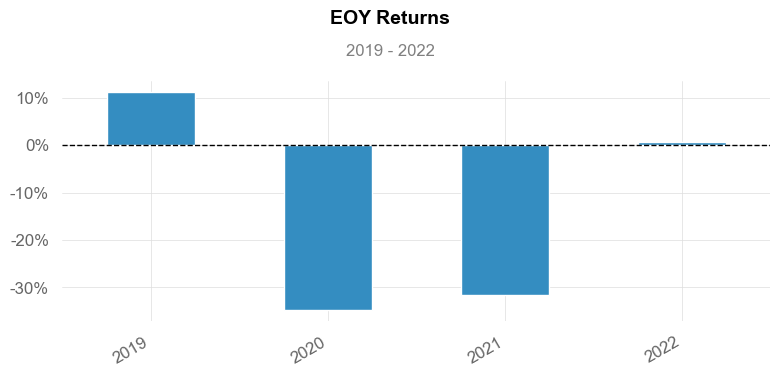

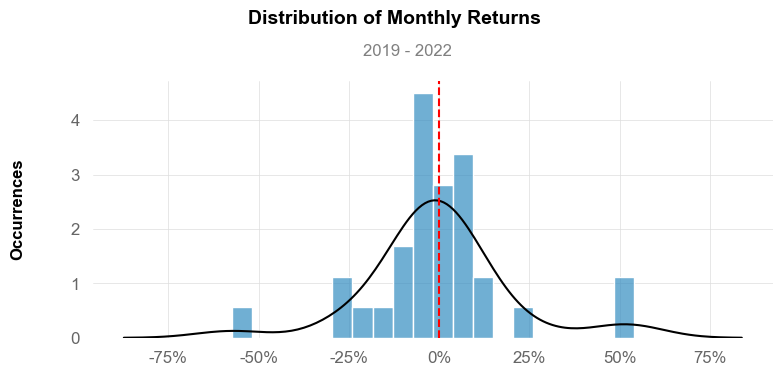

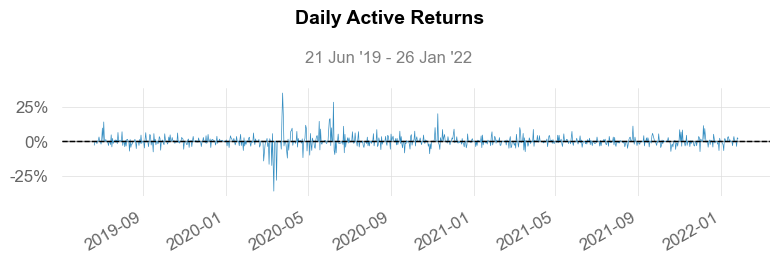

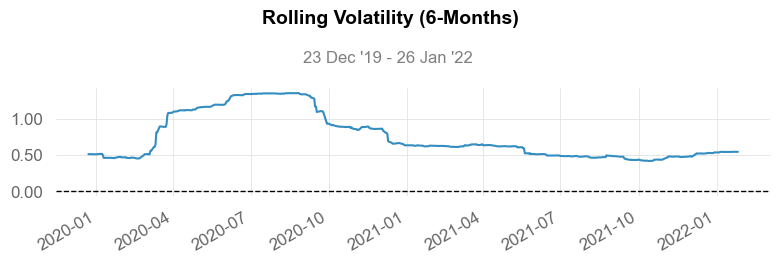

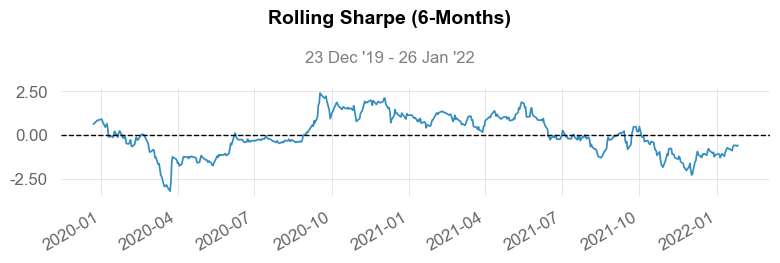

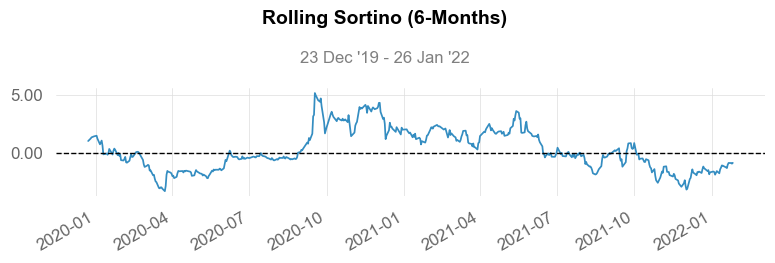

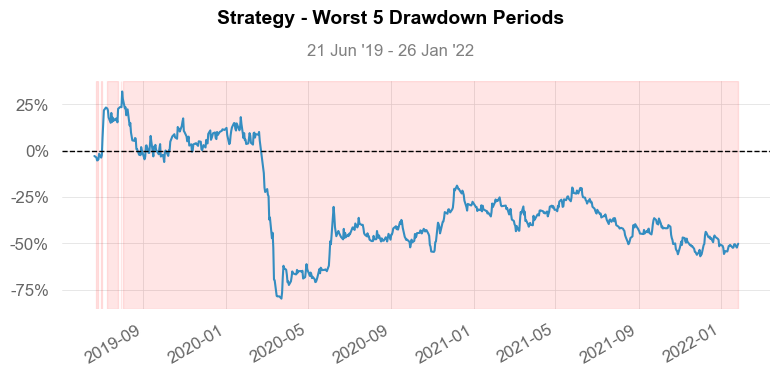

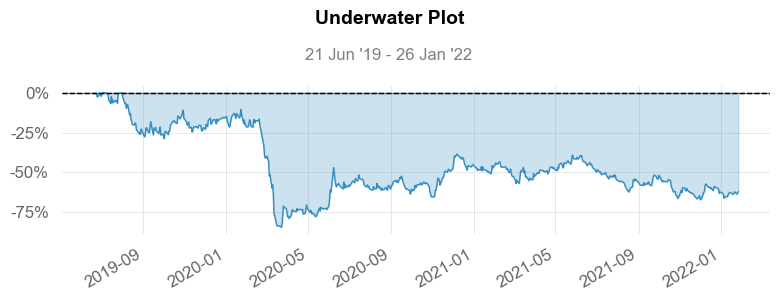

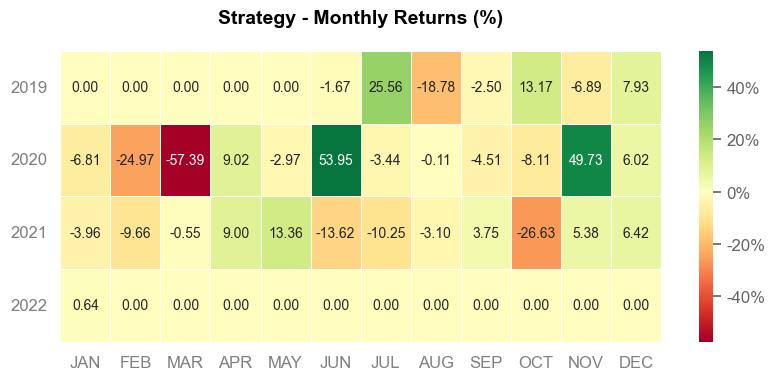

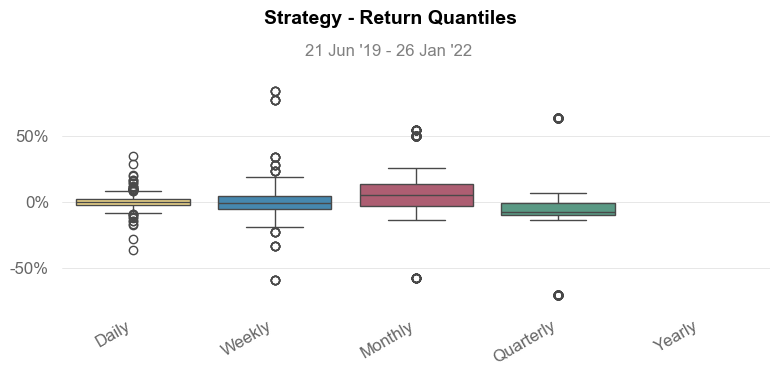

C:\Users\jefer\anaconda3\envs\teste_finrl\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)

C:\Users\jefer\anaconda3\envs\teste_finrl\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)

C:\Users\jefer\anaconda3\envs\teste_finrl\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)



In [55]:
try:
    if if_using_ppo:
        returns_ppo = tratando_retornos(df_account_value_ppo,'account_value')
        qs.extend_pandas()
        qs.reports.full(returns_ppo)
        qs.reports.html(returns_ppo, output='ppo_quantstats.html')
    else:
        None
except:
    pass

## TD3

C:\Users\jefer\anaconda3\envs\teste_finrl\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)

C:\Users\jefer\anaconda3\envs\teste_finrl\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)

C:\Users\jefer\anaconda3\envs\teste_finrl\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)



                           Strategy
-------------------------  ----------
Start Period               2019-06-21
End Period                 2022-01-26
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -10.88%
CAGR﹪                     -3.01%

Sharpe                     0.21
Prob. Sharpe Ratio         63.01%
Smart Sharpe               0.2
Sortino                    0.31
Smart Sortino              0.3
Sortino/√2                 0.22
Smart Sortino/√2           0.21
Omega                      1.04

Max Drawdown               -58.74%
Longest DD Days            722
Volatility (ann.)          57.89%
Calmar                     -0.05
Skew                       0.3
Kurtosis                   9.79

Expected Daily %           -0.02%
Expected Monthly %         -0.36%
Expected Yearly %          -2.84%
Kelly Criterion            1.79%
Risk of Ruin               0.0%
Daily Value-at-Risk        -5.95%
Expected Shortfall (cVaR)  -5.95%

Max Consecutive Wins    

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2020-02-05,2022-01-10,2022-01-26,722,-58.742920,-57.025667
2,2019-08-02,2019-08-27,2019-09-25,55,-14.397669,-13.470667
3,2019-10-23,2019-11-12,2019-11-27,36,-12.285294,-11.411338
4,2019-12-20,2020-01-08,2020-01-16,28,-8.199911,-7.703235
5,2019-10-01,2019-10-08,2019-10-09,9,-7.485989,-5.837679


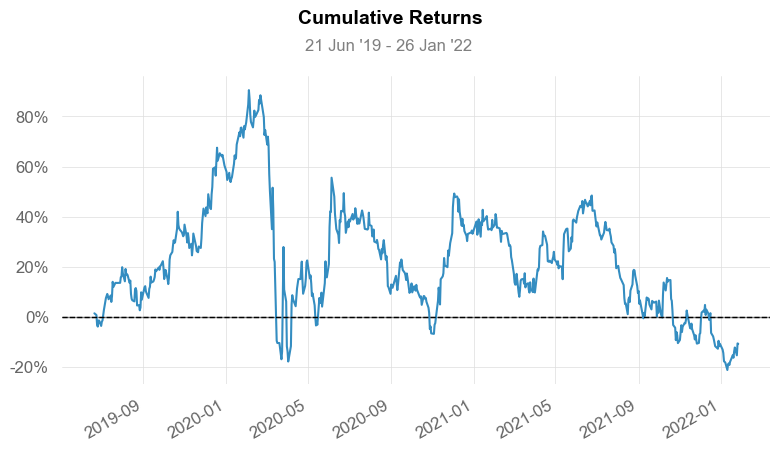

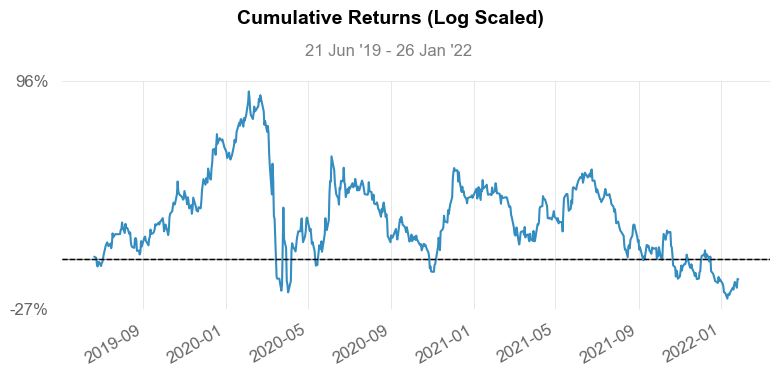

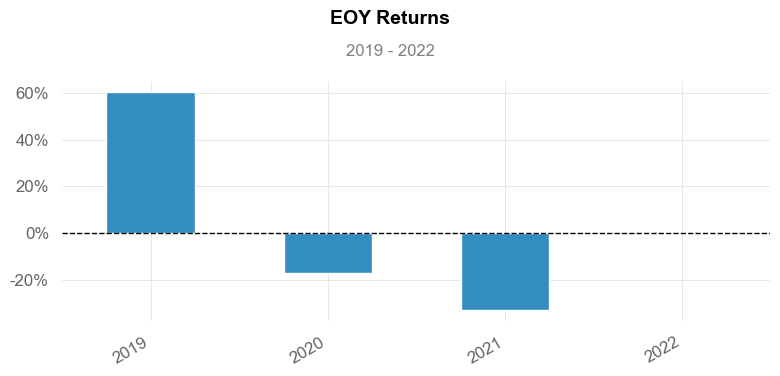

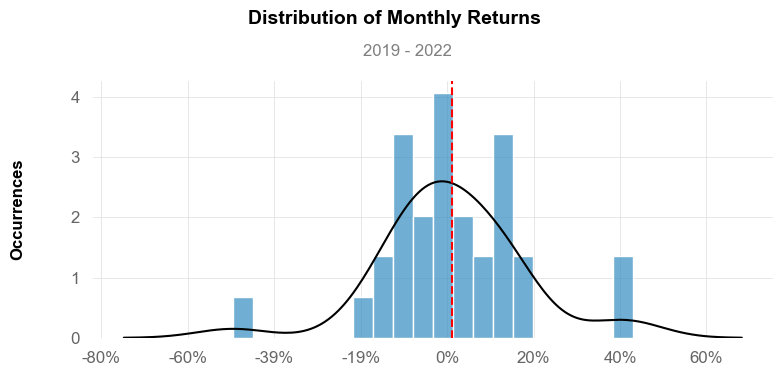

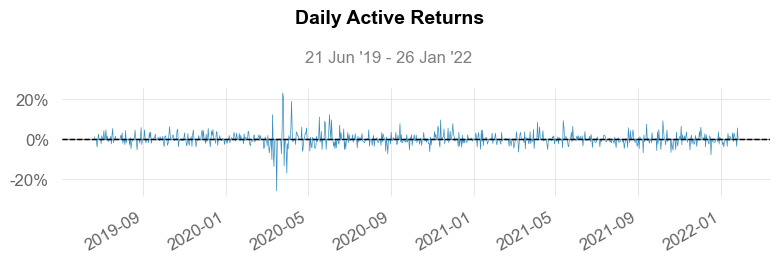

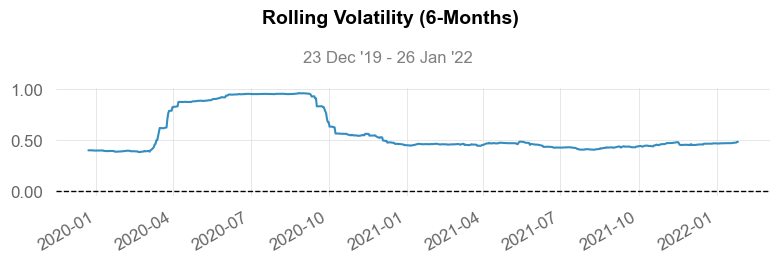

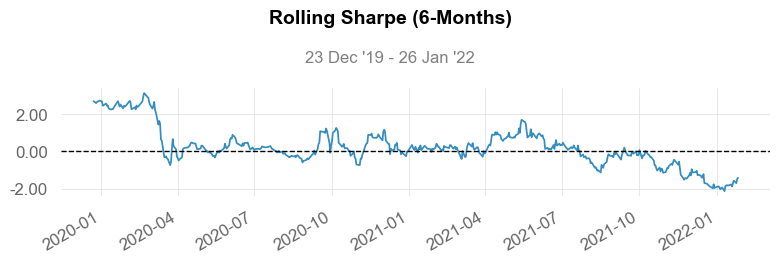

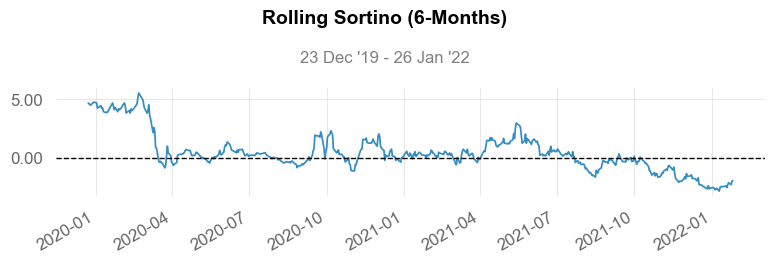

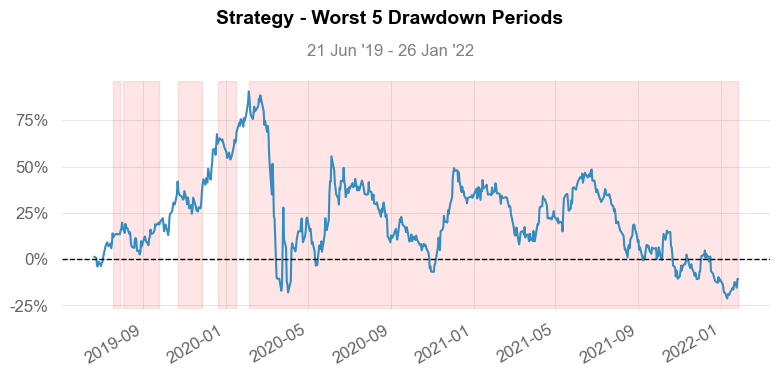

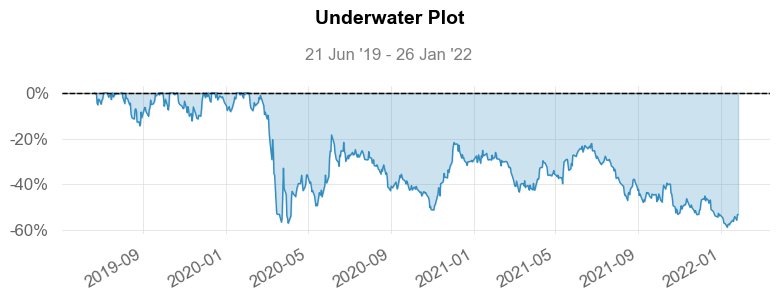

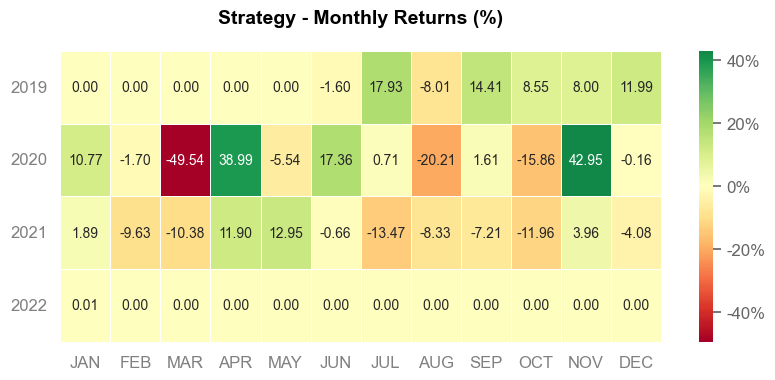

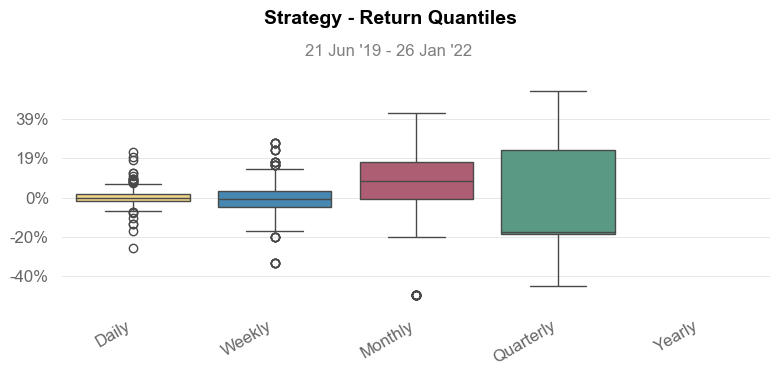

C:\Users\jefer\anaconda3\envs\teste_finrl\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)

C:\Users\jefer\anaconda3\envs\teste_finrl\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)

C:\Users\jefer\anaconda3\envs\teste_finrl\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)



In [56]:
try:
    if if_using_td3:
        returns_td3 = tratando_retornos(df_account_value_td3,'account_value')
        qs.extend_pandas()
        qs.reports.full(returns_td3)
        qs.reports.html(returns_td3, output='td3_quantstats.html')
    else:
        None
except:
    pass

## SAC

C:\Users\jefer\anaconda3\envs\teste_finrl\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)

C:\Users\jefer\anaconda3\envs\teste_finrl\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)

C:\Users\jefer\anaconda3\envs\teste_finrl\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)



                           Strategy
-------------------------  ----------
Start Period               2019-06-21
End Period                 2022-01-26
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          -53.33%
CAGR﹪                     -18.3%

Sharpe                     -0.46
Prob. Sharpe Ratio         22.98%
Smart Sharpe               -0.45
Sortino                    -0.6
Smart Sortino              -0.59
Sortino/√2                 -0.42
Smart Sortino/√2           -0.42
Omega                      0.92

Max Drawdown               -70.12%
Longest DD Days            923
Volatility (ann.)          44.26%
Calmar                     -0.26
Skew                       -1.54
Kurtosis                   15.51

Expected Daily %           -0.12%
Expected Monthly %         -2.35%
Expected Yearly %          -17.35%
Kelly Criterion            -4.33%
Risk of Ruin               0.0%
Daily Value-at-Risk        -4.67%
Expected Shortfall (cVaR)  -4.67%

Max Consecut

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2019-07-19,2020-04-24,2022-01-26,923,-70.124128,-68.895339
2,2019-07-02,2019-07-02,2019-07-05,4,-3.262171,-1.661035
3,2019-06-24,2019-06-25,2019-06-27,4,-2.525708,-2.042414
4,2019-07-17,2019-07-17,2019-07-17,1,-1.849969,NaN
5,2019-07-11,2019-07-12,2019-07-12,2,-1.001380,-0.352723


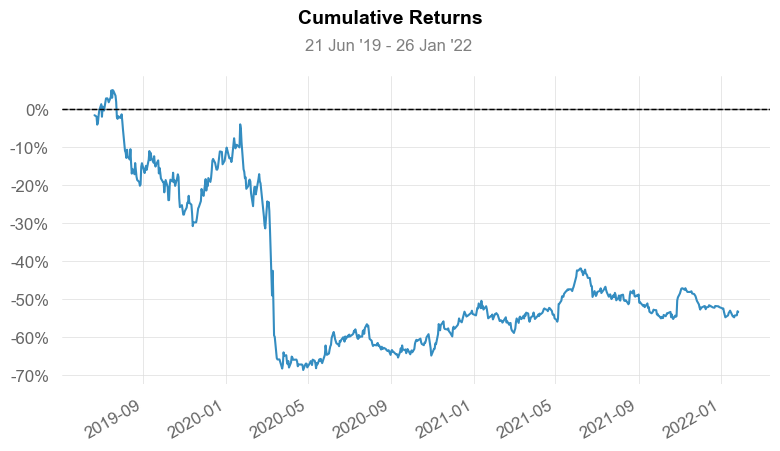

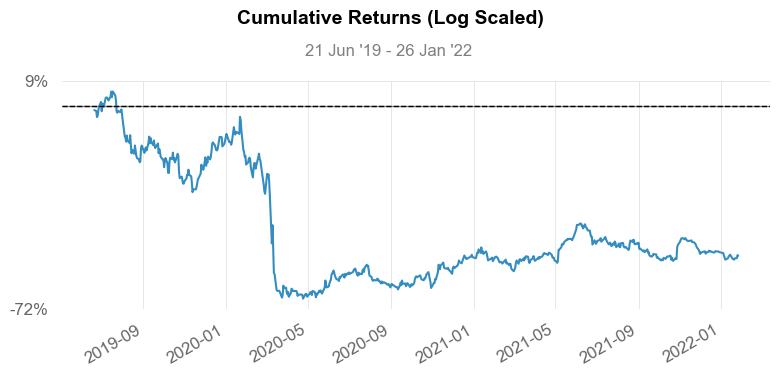

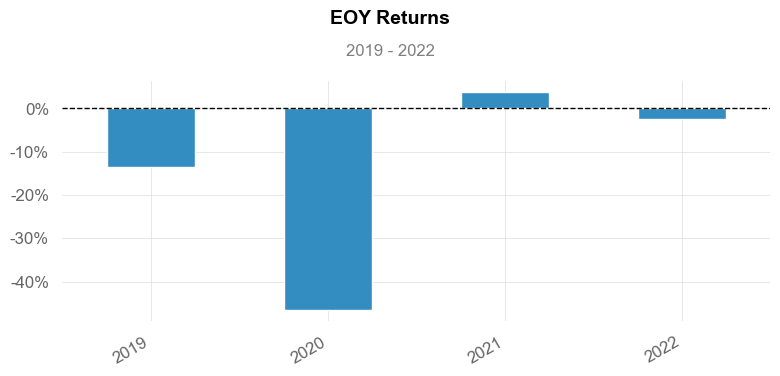

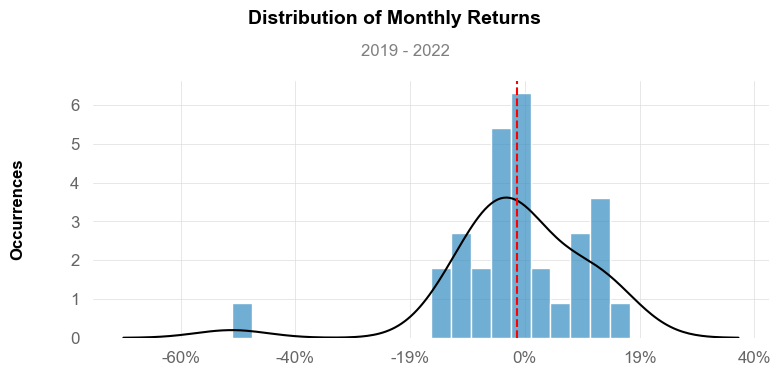

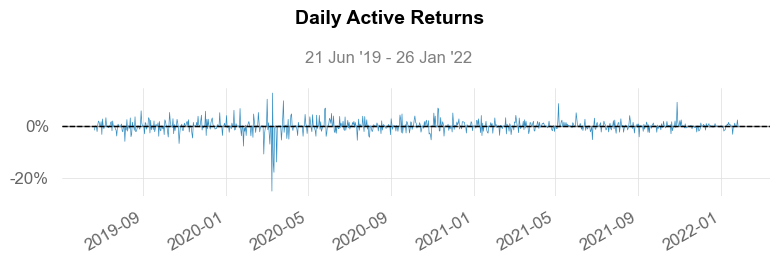

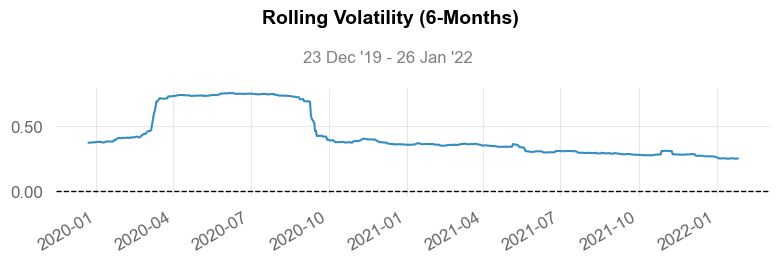

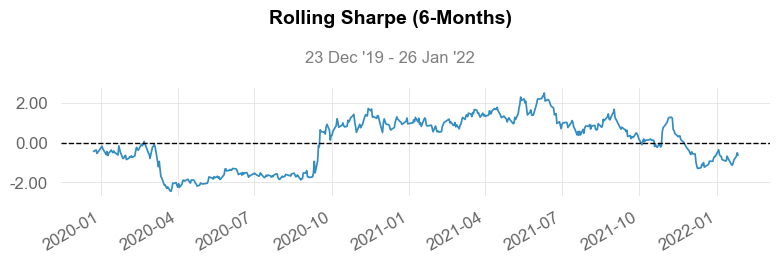

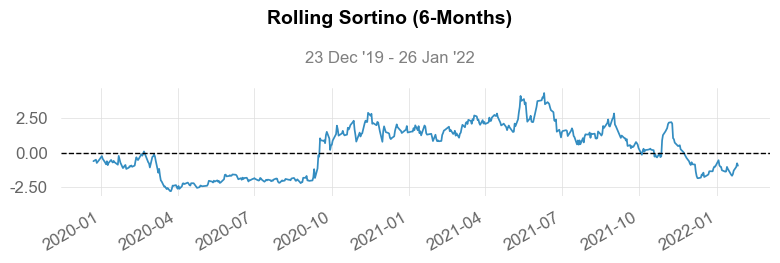

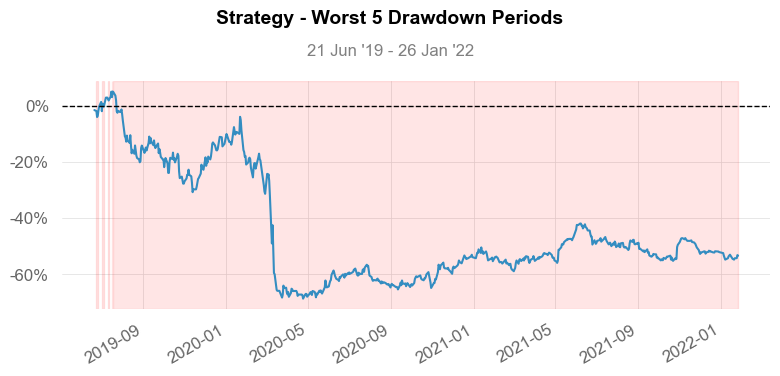

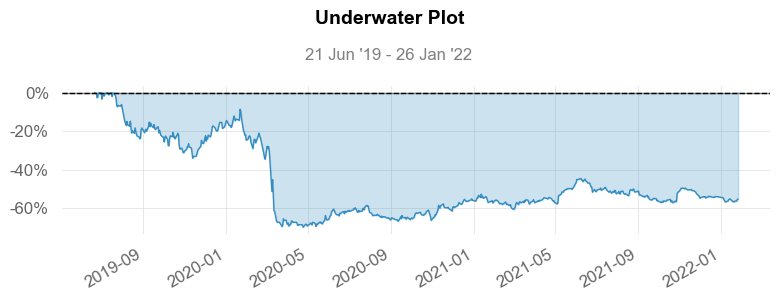

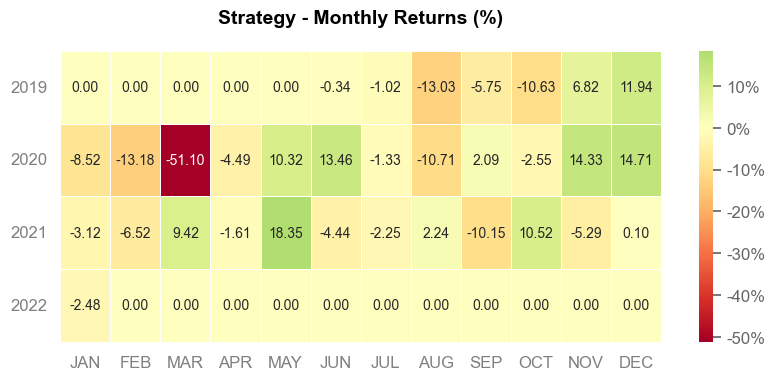

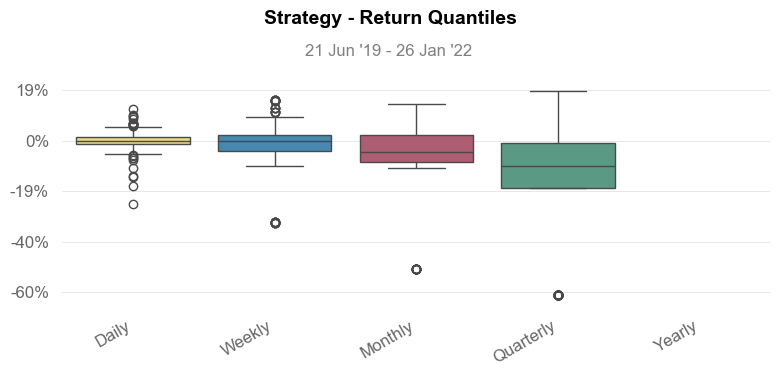

C:\Users\jefer\anaconda3\envs\teste_finrl\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)

C:\Users\jefer\anaconda3\envs\teste_finrl\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)

C:\Users\jefer\anaconda3\envs\teste_finrl\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)



In [57]:
try:
    if if_using_sac:
        returns_sac = tratando_retornos(df_account_value_sac,'account_value')
        qs.extend_pandas()
        qs.reports.full(returns_sac)
        qs.reports.html(returns_sac, output='sac_quantstats.html')
    else:
        None
except:
    pass

## MEAN VAR

C:\Users\jefer\anaconda3\envs\teste_finrl\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)

C:\Users\jefer\anaconda3\envs\teste_finrl\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)

C:\Users\jefer\anaconda3\envs\teste_finrl\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)



                           Strategy
-------------------------  ----------
Start Period               2019-06-21
End Period                 2022-01-26
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          37.8%
CAGR﹪                     8.88%

Sharpe                     0.6
Prob. Sharpe Ratio         82.29%
Smart Sharpe               0.51
Sortino                    0.81
Smart Sortino              0.68
Sortino/√2                 0.57
Smart Sortino/√2           0.48
Omega                      1.12

Max Drawdown               -36.32%
Longest DD Days            356
Volatility (ann.)          27.8%
Calmar                     0.24
Skew                       -1.37
Kurtosis                   9.78

Expected Daily %           0.05%
Expected Monthly %         1.01%
Expected Yearly %          8.35%
Kelly Criterion            5.5%
Risk of Ruin               0.0%
Daily Value-at-Risk        -2.81%
Expected Shortfall (cVaR)  -2.81%

Max Consecutive Wins       9
M

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2020-01-24,2020-04-03,2021-01-13,356,-36.317433,-33.625009
2,2021-06-08,2022-01-18,2022-01-26,233,-20.723138,-20.023061
3,2021-01-15,2021-03-08,2021-04-01,77,-12.909732,-11.526094
4,2019-08-12,2019-08-26,2019-09-10,30,-5.463037,-4.680843
5,2021-05-10,2021-05-12,2021-05-14,5,-5.070504,-3.373946


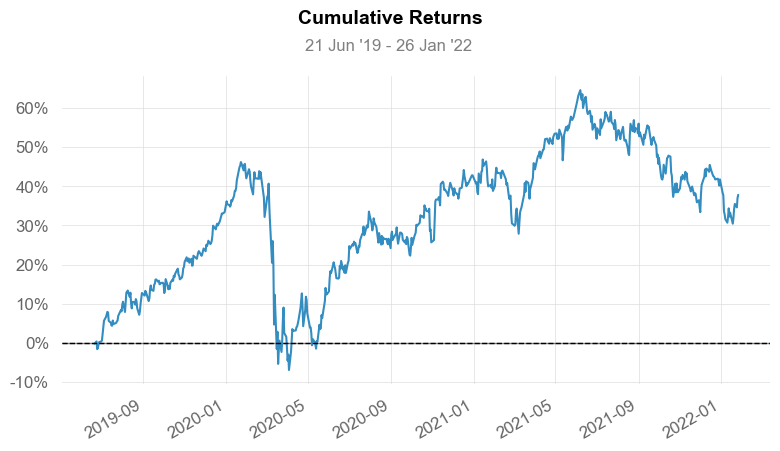

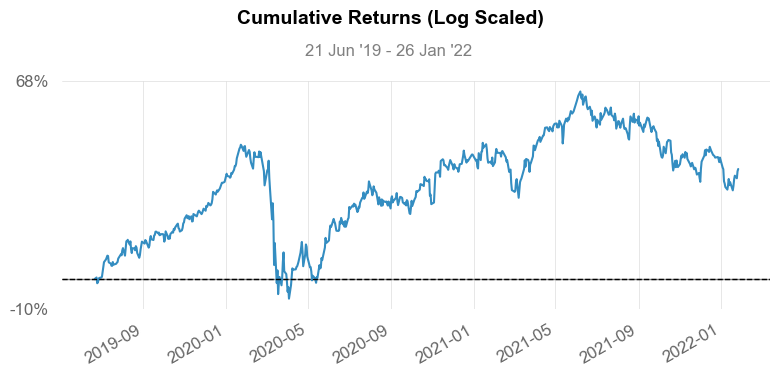

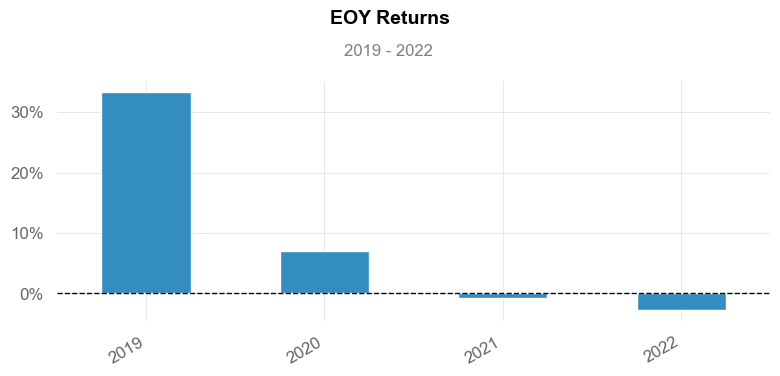

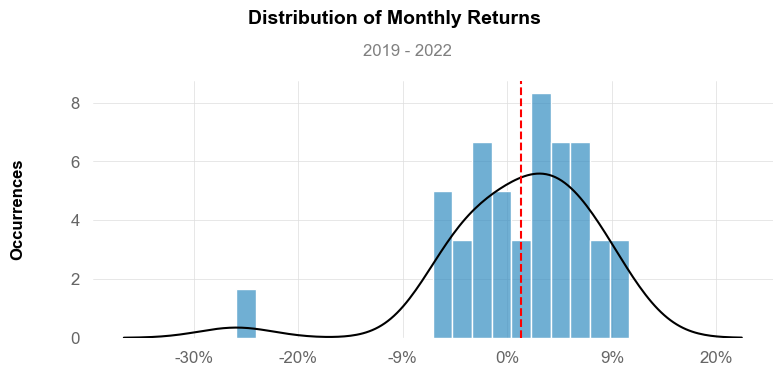

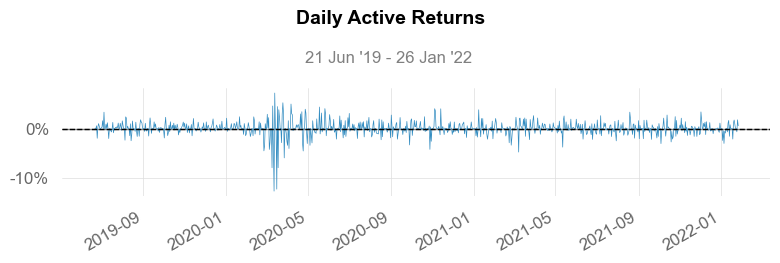

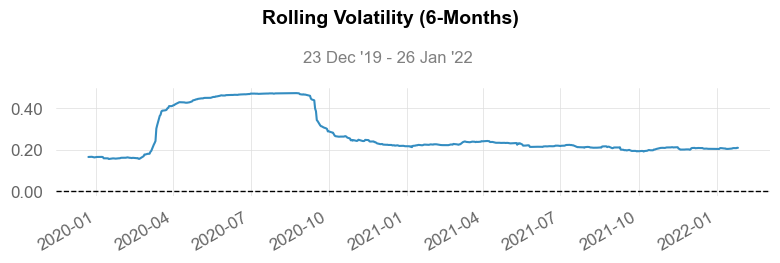

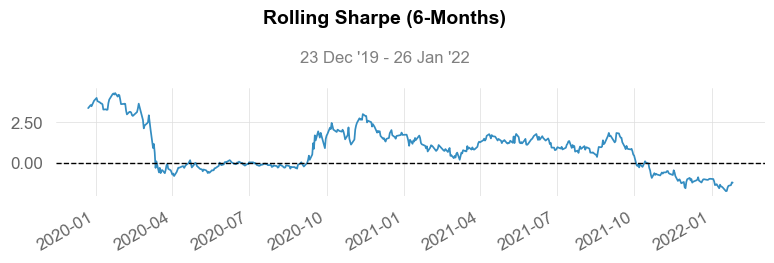

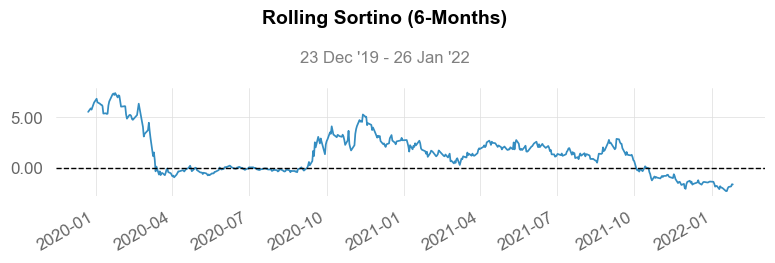

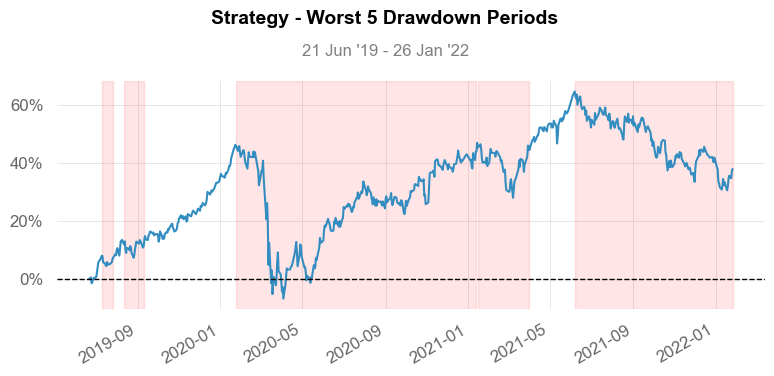

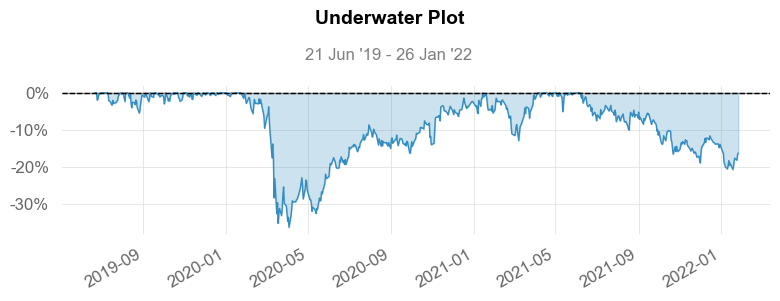

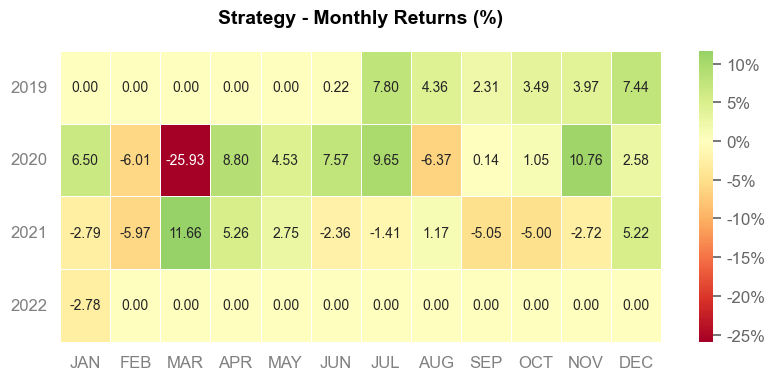

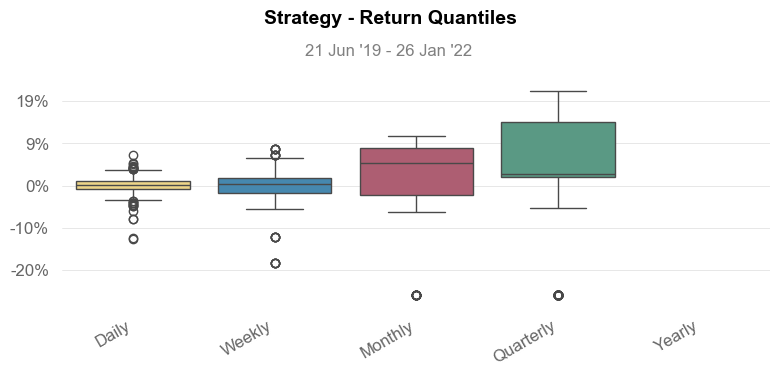

C:\Users\jefer\anaconda3\envs\teste_finrl\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)

C:\Users\jefer\anaconda3\envs\teste_finrl\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)

C:\Users\jefer\anaconda3\envs\teste_finrl\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)



In [58]:
try:
    returns_mean_var = tratando_retornos_mean(MVO_result,'Mean Var')
    qs.extend_pandas()
    qs.reports.full(returns_mean_var)
    qs.reports.html(returns_mean_var, output='mean_var_quantstats.html')
except:
    pass

## IBOVESPA

C:\Users\jefer\anaconda3\envs\teste_finrl\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)

C:\Users\jefer\anaconda3\envs\teste_finrl\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)

C:\Users\jefer\anaconda3\envs\teste_finrl\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)



                           Strategy
-------------------------  ----------
Start Period               2019-06-21
End Period                 2022-01-25
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          9.51%
CAGR﹪                     2.44%

Sharpe                     0.27
Prob. Sharpe Ratio         66.71%
Smart Sharpe               0.21
Sortino                    0.36
Smart Sortino              0.28
Sortino/√2                 0.26
Smart Sortino/√2           0.2
Omega                      1.06

Max Drawdown               -46.82%
Longest DD Days            348
Volatility (ann.)          31.57%
Calmar                     0.05
Skew                       -1.12
Kurtosis                   16.1

Expected Daily %           0.01%
Expected Monthly %         0.28%
Expected Yearly %          2.3%
Kelly Criterion            2.78%
Risk of Ruin               0.0%
Daily Value-at-Risk        -3.24%
Expected Shortfall (cVaR)  -3.24%

Max Consecutive Wins       8


None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2020-01-24,2020-03-23,2021-01-05,348,-46.815809,-42.831805
2,2021-06-08,2021-12-01,2022-01-25,232,-22.940754,-22.339726
3,2021-01-11,2021-02-26,2021-05-27,137,-12.026192,-11.786340
4,2019-07-11,2019-08-26,2019-10-18,100,-8.870975,-8.071482
5,2019-11-08,2019-11-19,2019-12-03,26,-3.616503,-3.346383


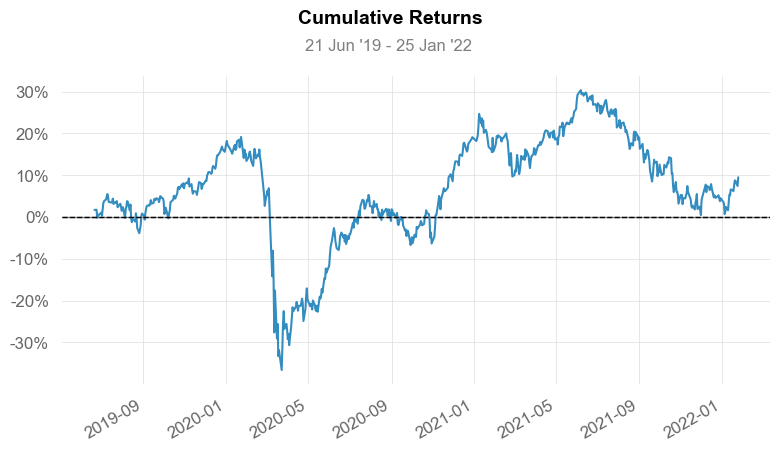

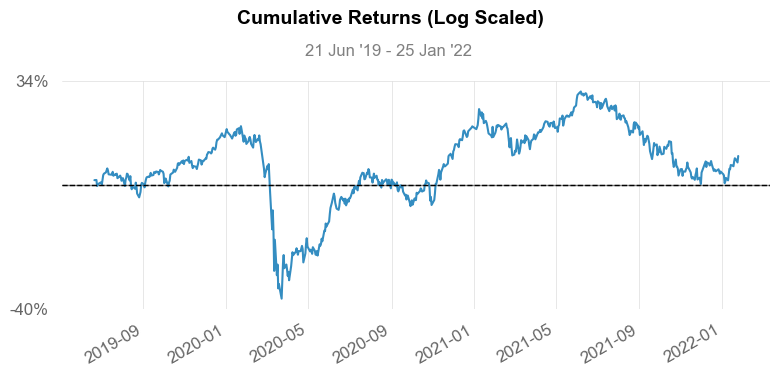

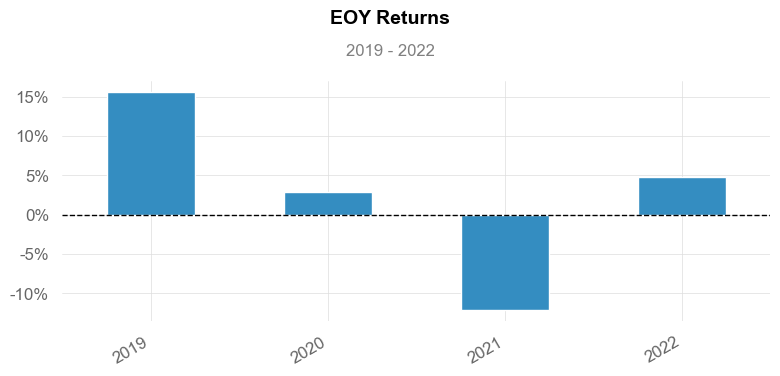

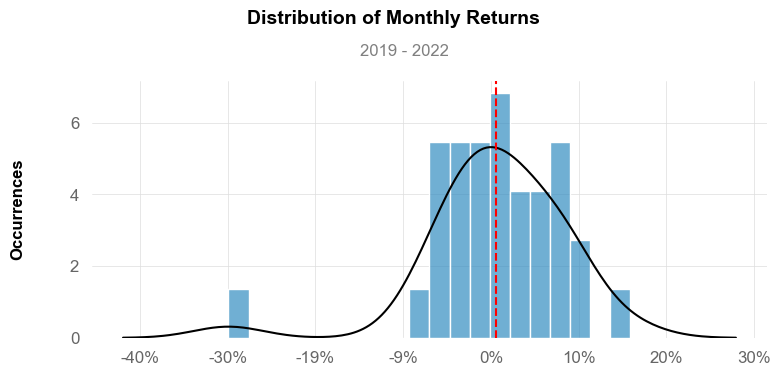

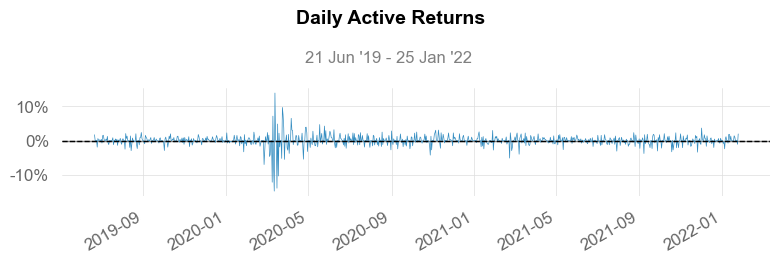

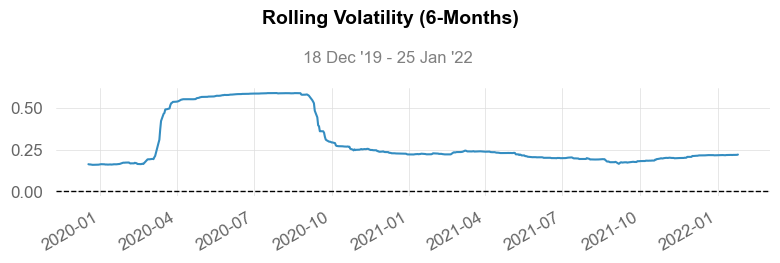

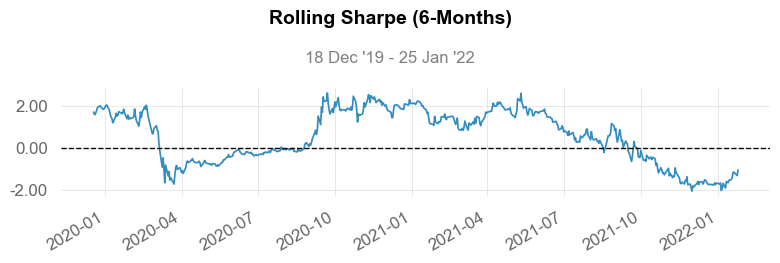

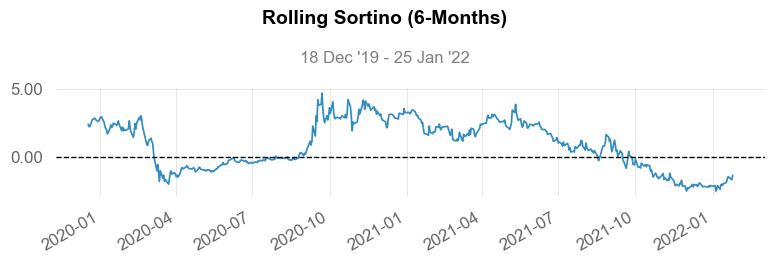

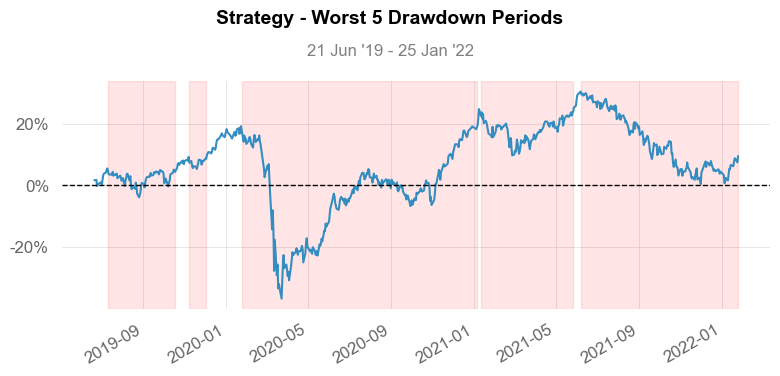

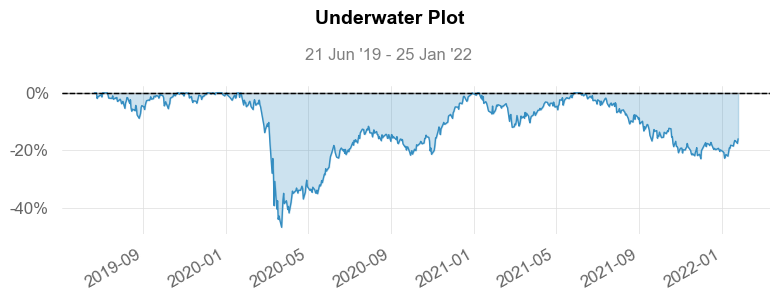

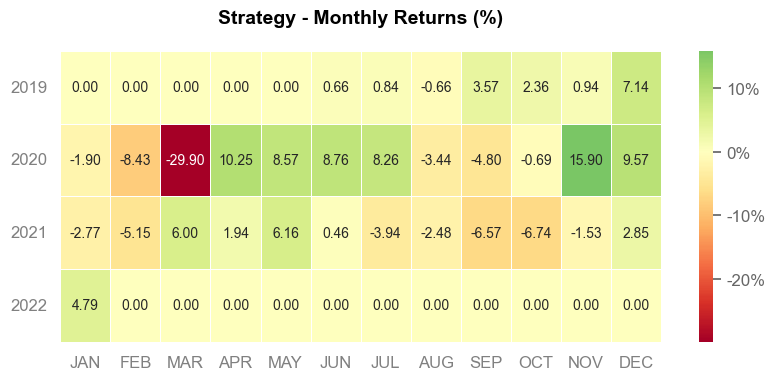

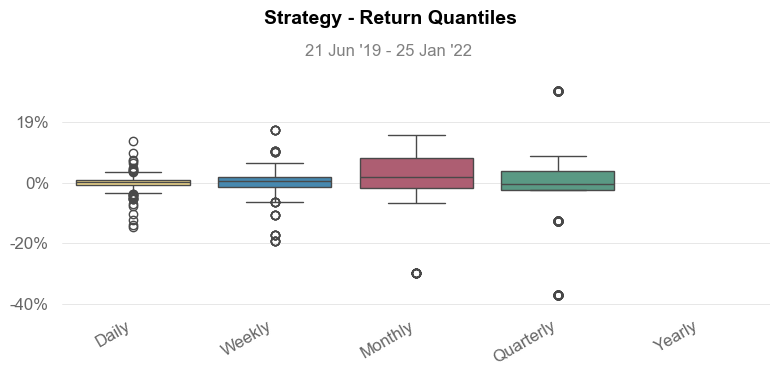

C:\Users\jefer\anaconda3\envs\teste_finrl\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)

C:\Users\jefer\anaconda3\envs\teste_finrl\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)

C:\Users\jefer\anaconda3\envs\teste_finrl\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)



In [59]:
try:
    returns_ibovespa = tratando_retornos(df_ibovespa,'close')
    qs.extend_pandas()
    qs.reports.full(returns_ibovespa)
    qs.reports.html(returns_ibovespa, output='ibovespa_quantstats.html')
except:
    pass